In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np   # 배열 사용할 때 numpy
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def saturation(val):
  if val > 255:
    val = 255
  elif val < 0:
    val = 0
  return val #255이상은 내리고 0으로 내려가면 0이상으로 올림

(256, 256, 3)


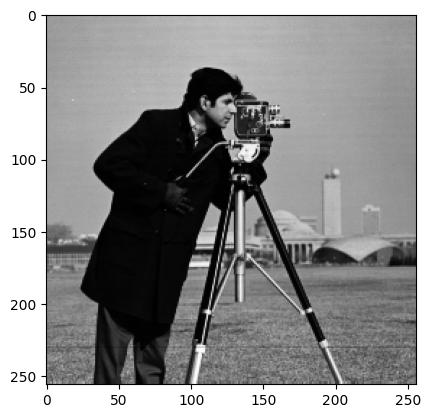

In [3]:
img = cv2.imread('/content/gdrive/My Drive/images/camera.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg1, cmap='gray')

In [4]:
LUT = np.zeros(256, dtype=np.ubyte)

In [5]:
gPoint = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

In [6]:
for i in range(256):
  val = 255*(np.float32(i)/128-1)*(np.float32(i)/128-1)
  LUT[i] = val;

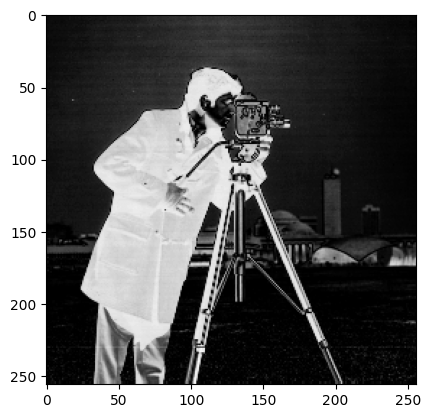

In [8]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    gPoint[h,w] = LUT[gimg1[h,w]]

plt.imshow(gPoint, cmap='gray')

(256, 256, 3)


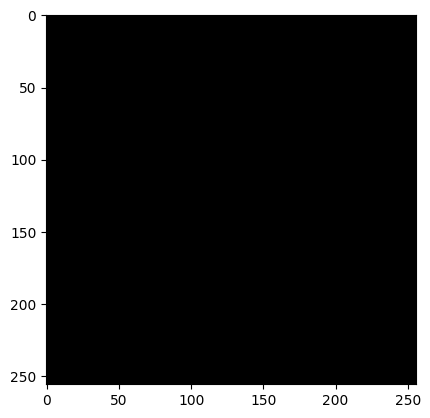

In [11]:
img = cv2.imread('/content/gdrive/My Drive/images/background.bmp')
print(img.shape)
gimg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg2, cmap='gray')

In [12]:
print(gimg2[100,100])

50


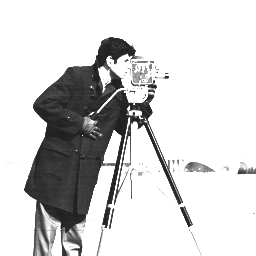

In [13]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    val = np.float32(gimg1[h,w]) / np.float32(gimg2[h,w])
    gPoint[h,w] = saturation(val * 200)

#pit.imshow(gPoint, cmap='gray')
cv2_imshow(gPoint)

픽셀 나눗셈: 밝은 색으로 나누면 어두워짐 어두운 색으로 나누면 밝아짐